<center><a href="#part2">part2</a> | <a href="#part3">part3</a> | <a href="#part4">part4</a>  </center>

In [70]:
import pandas as pd
from PIL import Image
import requests
from tqdm._tqdm_notebook import tqdm_notebook
import os
import IPython

In [46]:
tab1=pd.read_csv("tab1.csv")
tab2=pd.read_csv("tab2.csv")
tab1.head(3)

ID #   reportType  photo_date photo_time from_device  AuthorName  \
0  161872  Flood Watch  2024-04-12   11:56 am  iOS 17.4.1         NaN   
1  161869  Flood Watch  2024-04-12   11:40 am  iOS 15.8.2         NaN   
2  161865  Flood Watch  2024-04-12   11:37 am  iOS 15.8.2         NaN   

   AuthorEmail                                 URL  \
0          NaN  https://mycoast.org/reports/161872   
1          NaN  https://mycoast.org/reports/161869   
2          NaN  https://mycoast.org/reports/161865   

                                              images  location_longitude  ...  \
0  https://report-images.nyc3.digitaloceanspaces....          -73.769758  ...   
1  https://report-images.nyc3.digitaloceanspaces....          -73.832707  ...   
2  https://report-images.nyc3.digitaloceanspaces....          -73.832843  ...   

   response_other road_damage_detail marinas_damage_detail  \
0             NaN                NaN                   NaN   
1             NaN                NaN                   NaN   
2             NaN                NaN                   NaN   

  beach_damage_detail buildings_damage_detail hazmat_damage_detail  \
0                 NaN                     NaN                  NaN   
1                 NaN                     NaN                  NaN   
2                 NaN                     NaN                  NaN   

   response_damage  amazonS3_cache  place_name  structure_damage_detail  
0              NaN             NaN         NaN                      NaN  
1              NaN             NaN         NaN                      NaN  
2              NaN             NaN         NaN                      NaN  

[3 rows x 60 columns]

In [47]:
tab2.head(3)

ID #   reportType  photo_date photo_time              from_device  \
0  138454  Flood Watch  2019-11-13   04:00 pm  Can reports - Survey123   
1  135304  Flood Watch  2019-11-13   08:17 am   Can reports - Airtable   
2  139786  Flood Watch  2019-10-31   04:00 pm  Can reports - Survey123   

   AuthorName  AuthorEmail                                 URL  \
0         NaN          NaN  https://mycoast.org/reports/138454   
1         NaN          NaN  https://mycoast.org/reports/135304   
2         NaN          NaN  https://mycoast.org/reports/139786   

                                              images  location_longitude  ...  \
0  https://report-images.nyc3.digitaloceanspaces....          -73.788356  ...   
1  https://report-images.nyc3.digitaloceanspaces....          -73.788356  ...   
2  https://report-images.nyc3.digitaloceanspaces....          -73.830065  ...   

   buildings_damage buildings_street buildings_comments  \
0               NaN              NaN                NaN   
1               NaN              NaN                NaN   
2               NaN              NaN                NaN   

  hazmat_damage damage-cat hazmat_comments beach_damage  beach_comments  \
0                      NaN             NaN          NaN             NaN   
1                      NaN             NaN          NaN             NaN   
2                      NaN             NaN          NaN             NaN   

   structure_damage  structures_comments  response_other  
0               NaN                  NaN             NaN  
1               NaN                  NaN             NaN  
2               NaN                  NaN             NaN  

[3 rows x 51 columns]

In [48]:
comm_cols=list(set(tab1.columns).intersection(set(tab2.columns))) # get common fields
tab1=tab1[comm_cols] # select common fields
tab2=tab2[comm_cols] # select common fields
df=pd.concat([tab1,tab2]).reset_index() # concat (vertically), reset index to be count
df[["ID #"]] # check

ID #
0     161872
1     161869
2     161865
3     161715
4     161698
...      ...
1784  113708
1785  143134
1786  143141
1787  143127
1788  125609

[1789 rows x 1 columns]

----
# <a id="part2"></a>Using [ARCGIS](https://www.arcgis.com/apps/dashboards/3d33b3daab764c979bbc1229e87d086a):

`arcgis`:

<img src="https://i.postimg.cc/d3DQYTFm/1.png" width=700>

In [49]:
arcgis=pd.read_csv("arcgis.csv")
print(f"`arcgis` dataset has length: {len(arcgis)}")
arcgis.columns=["objectid","globalid","flooded places","weather","approximate depth","time","date","causes","neighborhood","x","y"]
arcgis.date=arcgis.date.str.split("T").str[0]
arcgis.head(3)
# which fields are uploaded by user

`arcgis` dataset has length: 724


objectid                              globalid           flooded places  \
0        20  e4ec81f4-186d-41b0-8779-a0e938c814a3                 property   
1        21  934fab2f-3314-4abc-8583-ff1a3b968439            roads_streets   
2        22  0a4db08d-ae85-441e-86b2-80842c85c4c9  roads_streets,sidewalks   

                 weather  approximate depth   time        date  \
0             light_rain                NaN  12:00  2020-05-07   
1             light_rain                NaN  12:00  2020-05-07   
2  light_wind,light_rain                NaN  00:30  2020-05-07   

                            causes    neighborhood          x          y  
0                              NaN             NaN -73.837982  40.657893  
1                              NaN             NaN -73.837842  40.657755  
2  Storm_drain_Water_bubbling_up_f  Hamilton Beach -73.829444  40.653456

In [50]:
imglist=sorted(os.listdir("./img"), key=lambda x: int(x.split("-")[0]))

def getimgstr(id,prefix="",glue="|"):
    assert glue in ['<','>','|',':','?','\\','/','"','*'], "invalid, might cause ambiguity"
    return glue.join([prefix+x for x in imglist if x.split("-")[0]==str(id)])

arcgis["images"] = arcgis["objectid"].apply(getimgstr)
arcgis.iloc[-3:]

objectid                              globalid  \
721       777  1046acad-51d0-4527-83ab-abe4b7da12ab   
722       778  9d81cf5e-335a-491f-8968-348fb1f4bed7   
723       779  adea909c-2d99-47e8-8e76-66dc7fff4d78   

                             flooded places  \
721  roads_streets,sidewalks,property,other   
722                  roads_streets,property   
723        roads_streets,sidewalks,property   

                                          weather  approximate depth   time  \
721  heavy_wind_gusts,light_rain,heavy_rain,other               12.0  18:30   
722                                    light_rain                4.0  21:49   
723                         light_rain,heavy_rain                4.0  15:01   

           date                                             causes  \
721  2023-06-02  Rainfall_Water_pooling_from_dir,Storm_drain_Wa...   
722  2023-06-12  Rainfall_Water_pooling_from_dir,Storm_drain_Wa...   
723  2023-06-16  Rainfall_Water_pooling_from_dir,Storm_drain_Wa...   

    neighborhood          x          y                     images  
721    Brooklyn  -73.942715  40.659874  777-1104.jpg|777-1105.jpg  
722          NaN -73.942680  40.659922               778-1106.jpg  
723          NaN -73.943031  40.659775  779-1107.jpg|779-1108.jpg

### why objectID != idx+20:

- ?

In [73]:
arcgis

objectid                              globalid  \
0          20  e4ec81f4-186d-41b0-8779-a0e938c814a3   
1          21  934fab2f-3314-4abc-8583-ff1a3b968439   
2          22  0a4db08d-ae85-441e-86b2-80842c85c4c9   
3          23  79733b16-eda5-4d37-831a-816fbf3ab2e3   
4          24  efc6e186-66be-4e7c-866d-0f7eec330779   
..        ...                                   ...   
719       775  2d2a0aa6-ab81-4b76-8432-6534559f14ba   
720       776  cd812384-d867-4493-8673-5d8784173114   
721       777  1046acad-51d0-4527-83ab-abe4b7da12ab   
722       778  9d81cf5e-335a-491f-8968-348fb1f4bed7   
723       779  adea909c-2d99-47e8-8e76-66dc7fff4d78   

                             flooded places  \
0                                  property   
1                             roads_streets   
2                   roads_streets,sidewalks   
3          roads_streets,sidewalks,property   
4          roads_streets,sidewalks,property   
..                                      ...   
719        roads_streets,sidewalks,property   
720                                property   
721  roads_streets,sidewalks,property,other   
722                  roads_streets,property   
723        roads_streets,sidewalks,property   

                                          weather  approximate depth   time  \
0                                      light_rain                NaN  12:00   
1                                      light_rain                NaN  12:00   
2                           light_wind,light_rain                NaN  00:30   
3                           light_wind,light_rain                NaN  00:39   
4                           light_wind,light_rain                NaN  00:30   
..                                            ...                ...    ...   
719                                    light_rain                5.0  09:31   
720                                    heavy_rain               24.0  21:57   
721  heavy_wind_gusts,light_rain,heavy_rain,other               12.0  18:30   
722                                    light_rain                4.0  21:49   
723                         light_rain,heavy_rain                4.0  15:01   

           date                                             causes  \
0    2020-05-07                                                NaN   
1    2020-05-07                                                NaN   
2    2020-05-07                    Storm_drain_Water_bubbling_up_f   
3    2020-05-07                                                NaN   
4    2020-05-07                                                NaN   
..          ...                                                ...   
719  2023-02-21  Overland_flooding_Water_coming_,Rainfall_Water...   
720  2023-04-30  Rainfall_Water_pooling_from_dir,Storm_drain_Wa...   
721  2023-06-02  Rainfall_Water_pooling_from_dir,Storm_drain_Wa...   
722  2023-06-12  Rainfall_Water_pooling_from_dir,Storm_drain_Wa...   
723  2023-06-16  Rainfall_Water_pooling_from_dir,Storm_drain_Wa...   

                neighborhood          x          y                     images  
0                        NaN -73.837982  40.657893                  20-20.jpg  
1                        NaN -73.837842  40.657755                  21-21.jpg  
2             Hamilton Beach -73.829444  40.653456                  22-22.jpg  
3                        NaN -73.817104  40.609023                  23-23.jpg  
4                        NaN -73.829534  40.653500                  24-24.jpg  
..                       ...        ...        ...                        ...  
719  Howard Beach, Queens NY -73.831090  40.658700               775-1102.jpg  
720            East Elmhurst -73.886160  40.765840               776-1103.jpg  
721                Brooklyn  -73.942715  40.659874  777-1104.jpg|777-1105.jpg  
722                      NaN -73.942680  40.659922               778-1106.jpg  
723                      NaN -73.943031  40.659775  779-1107.jpg|779-1108.jpg  

[724 rows x 12 columns]

In [51]:
arcgis.iloc[arcgis[arcgis.index!=arcgis.objectid-20].index[0]-1:].head(3)

objectid                              globalid  \
16        36  d199adb9-9c11-46c6-8b6b-e7cd57195ac0   
17        38  baab71f2-ac7e-4d8d-8046-536dfe605be4   
18        39  16ae590d-126d-4319-87c1-3986f90bbe59   

                      flooded places           weather  approximate depth  \
16  roads_streets,sidewalks,property        light_wind                NaN   
17                         sidewalks        light_wind                NaN   
18                     roads_streets  sunny,light_wind                3.0   

     time        date causes neighborhood          x          y  \
16  03:25  2020-05-08    NaN          NaN -73.830030  40.653425   
17  16:31  2020-08-08    NaN          NaN -73.841461  40.650101   
18  15:00  2020-09-19    NaN          NaN -73.788903  40.592147   

                 images  
16            36-36.jpg  
17                       
18  39-39.jpg|39-40.jpg

In [52]:
s123=pd.read_csv("s123.csv")
airtb=pd.read_csv("airtb.csv")


airtb[(airtb.S123_Object_ID>=36)&(airtb.S123_Object_ID<=40)]

S123_Object_ID             Date Address Neighborhood     Latitude  \
385            36.0   5/8/2020 03:25     NaN          NaN  40.65342493   
399            38.0   8/8/2020 16:31     NaN          NaN  40.65010102   
405            39.0  9/19/2020 15:00     NaN          NaN  40.59214690   
406            40.0  9/23/2020 16:59     NaN          NaN  40.59652778   

     Longitude                   Contact Event  \
385 -73.830030                         0   NaN   
399 -73.841461                         0   NaN   
405 -73.788903  jasimov@riserockaway.org   NaN   
406 -73.769944                        KG   NaN   

                              Source Approx. Depth  \
385  overland_flooding_flooding_from    1_6_inches   
399  overland_flooding_flooding_from    1_6_inches   
405  storm_drain_water_coming_from_s             3   
406  storm_drain_water_coming_from_s             5   

    What is affected by the flood waters?  \
385      roads_streets,sidewalks,property   
399                             sidewalks   
405                         roads_streets   
406                         roads_streets   

    What are additional causes of flooding?           Weather  \
385                                     NaN        light_wind   
399                                     NaN        light_wind   
405                                     NaN  sunny,light_wind   
406                                     NaN  sunny,light_wind   

                        Additional Comments  \
385  This was taken 2 hours past high tide.   
399                                       0   
405                                       0   
406                                       0   

    May we contact you in the future for any of the following reasons?   \
385                                                NaN                    
399                                                NaN                    
405                                                NaN                    
406                                                NaN                    

                                                 Photo  
385  ATT36_19957.jpeg (https://v5.airtableuserconte...  
399                                                NaN  
405  ATT39_IMG_0113.jpg (https://v5.airtableusercon...  
406  ATT41_IMG_20200923_130047.jpg (https://v5.airt...

In [53]:
s123[(s123.ObjectID>=36) & (s123.ObjectID<=40)].head()

ObjectID Date and Time of Observation  \
243        40              9/23/2020 16:59   
244        39              9/19/2020 15:00   
250        38               8/8/2020 16:31   
264        36               5/8/2020 03:25   

     How deep is the flood water (in inches)?        Contact Information  \
243                                        5.0                        KG   
244                                        3.0  jasimov@riserockaway.org   
250                                       16.0                         0   
264                                       16.0                         0   

    May we contact you?                                               Photo  \
243                  NaN  ATT41_IMG_20200923_130047.jpg (https://v5.airt...   
244                  NaN  ATT39_IMG_0113.jpg (https://v5.airtableusercon...   
250                  NaN                                                NaN   
264                  NaN  ATT36_19957.jpeg (https://v5.airtableuserconte...   

    Neighborhood  Longitude   Latitude  
243          NaN -73.769944  40.596528  
244          NaN -73.788903  40.592147  
250          NaN -73.841461  40.650101  
264          NaN -73.830030  40.653425

# <a id="part3"></a>QA/QC
## missing img file?
- ?: Is a photo mandatory -?-> missing


In [54]:
len(arcgis),len(set([int(x.split("-")[0]) for x in imglist]))

(724, 699)

In [55]:
set(arcgis.objectid)-set([int(x.split("-")[0]) for x in imglist])

{38,
 176,
 182,
 219,
 229,
 233,
 260,
 310,
 699,
 701,
 703,
 710,
 714,
 715,
 736,
 743,
 748,
 757,
 758,
 759,
 760,
 762,
 763,
 769,
 770}

## Photo reports without a county assigned

In [56]:
print("columns contain 'county' in `df`:{}".format([x for x in df.columns if "county" in x.lower()]))
print("columns contain 'county' in `s123`:{}".format([x for x in s123.columns if "county" in x.lower()]))
print("columns contain 'county' in `airtb`:{}".format([x for x in airtb.columns if "county" in x.lower()]))
print("columns contain 'county' in `arcgis`:{}".format([x for x in arcgis.columns if "county" in x.lower()]))

columns contain 'county' in `df`:[]
columns contain 'county' in `s123`:[]
columns contain 'county' in `airtb`:[]
columns contain 'county' in `arcgis`:[]


## Image exploration

In [57]:
df.loc[0,"images"]

'https://report-images.nyc3.digitaloceanspaces.com/2024/04/12115745/bb01cec7d3fb11bf29424a6b213a620c027e246a.jpg|https://report-images.nyc3.digitaloceanspaces.com/2024/04/12115742/33482175bfa082b50e8e263692ba3a468d7dda33.jpg|https://report-images.nyc3.digitaloceanspaces.com/2024/04/12115739/c7bc7f31ee82ac430a28c8a511dc4869003e0e56.jpg'

- `image` column contains url separated by `|`
- Show img:

  - ```python
      import IPython
      IPython.display.Image(df.loc[0,"images"].split("|")[0], width=300)
      ```

  - ```python
      im = Image.open(requests.get(df.loc[0,"images"].split("|")[0], stream=True).raw)
      im.thumbnail(size=[300,300])
      im
      ```

In [58]:
def showimg(id,dir="img",width=300):
    import os
    import IPython

    images =[x for x in os.listdir(dir) if x.split("-")[0]==str(id)]
    num_images = len(images)
    assert num_images>0, f"No images found for: {os.path.join(dir,str(id))}"
    
    for i in images:
        display(IPython.display.Image(os.path.join(dir,i),width=width))


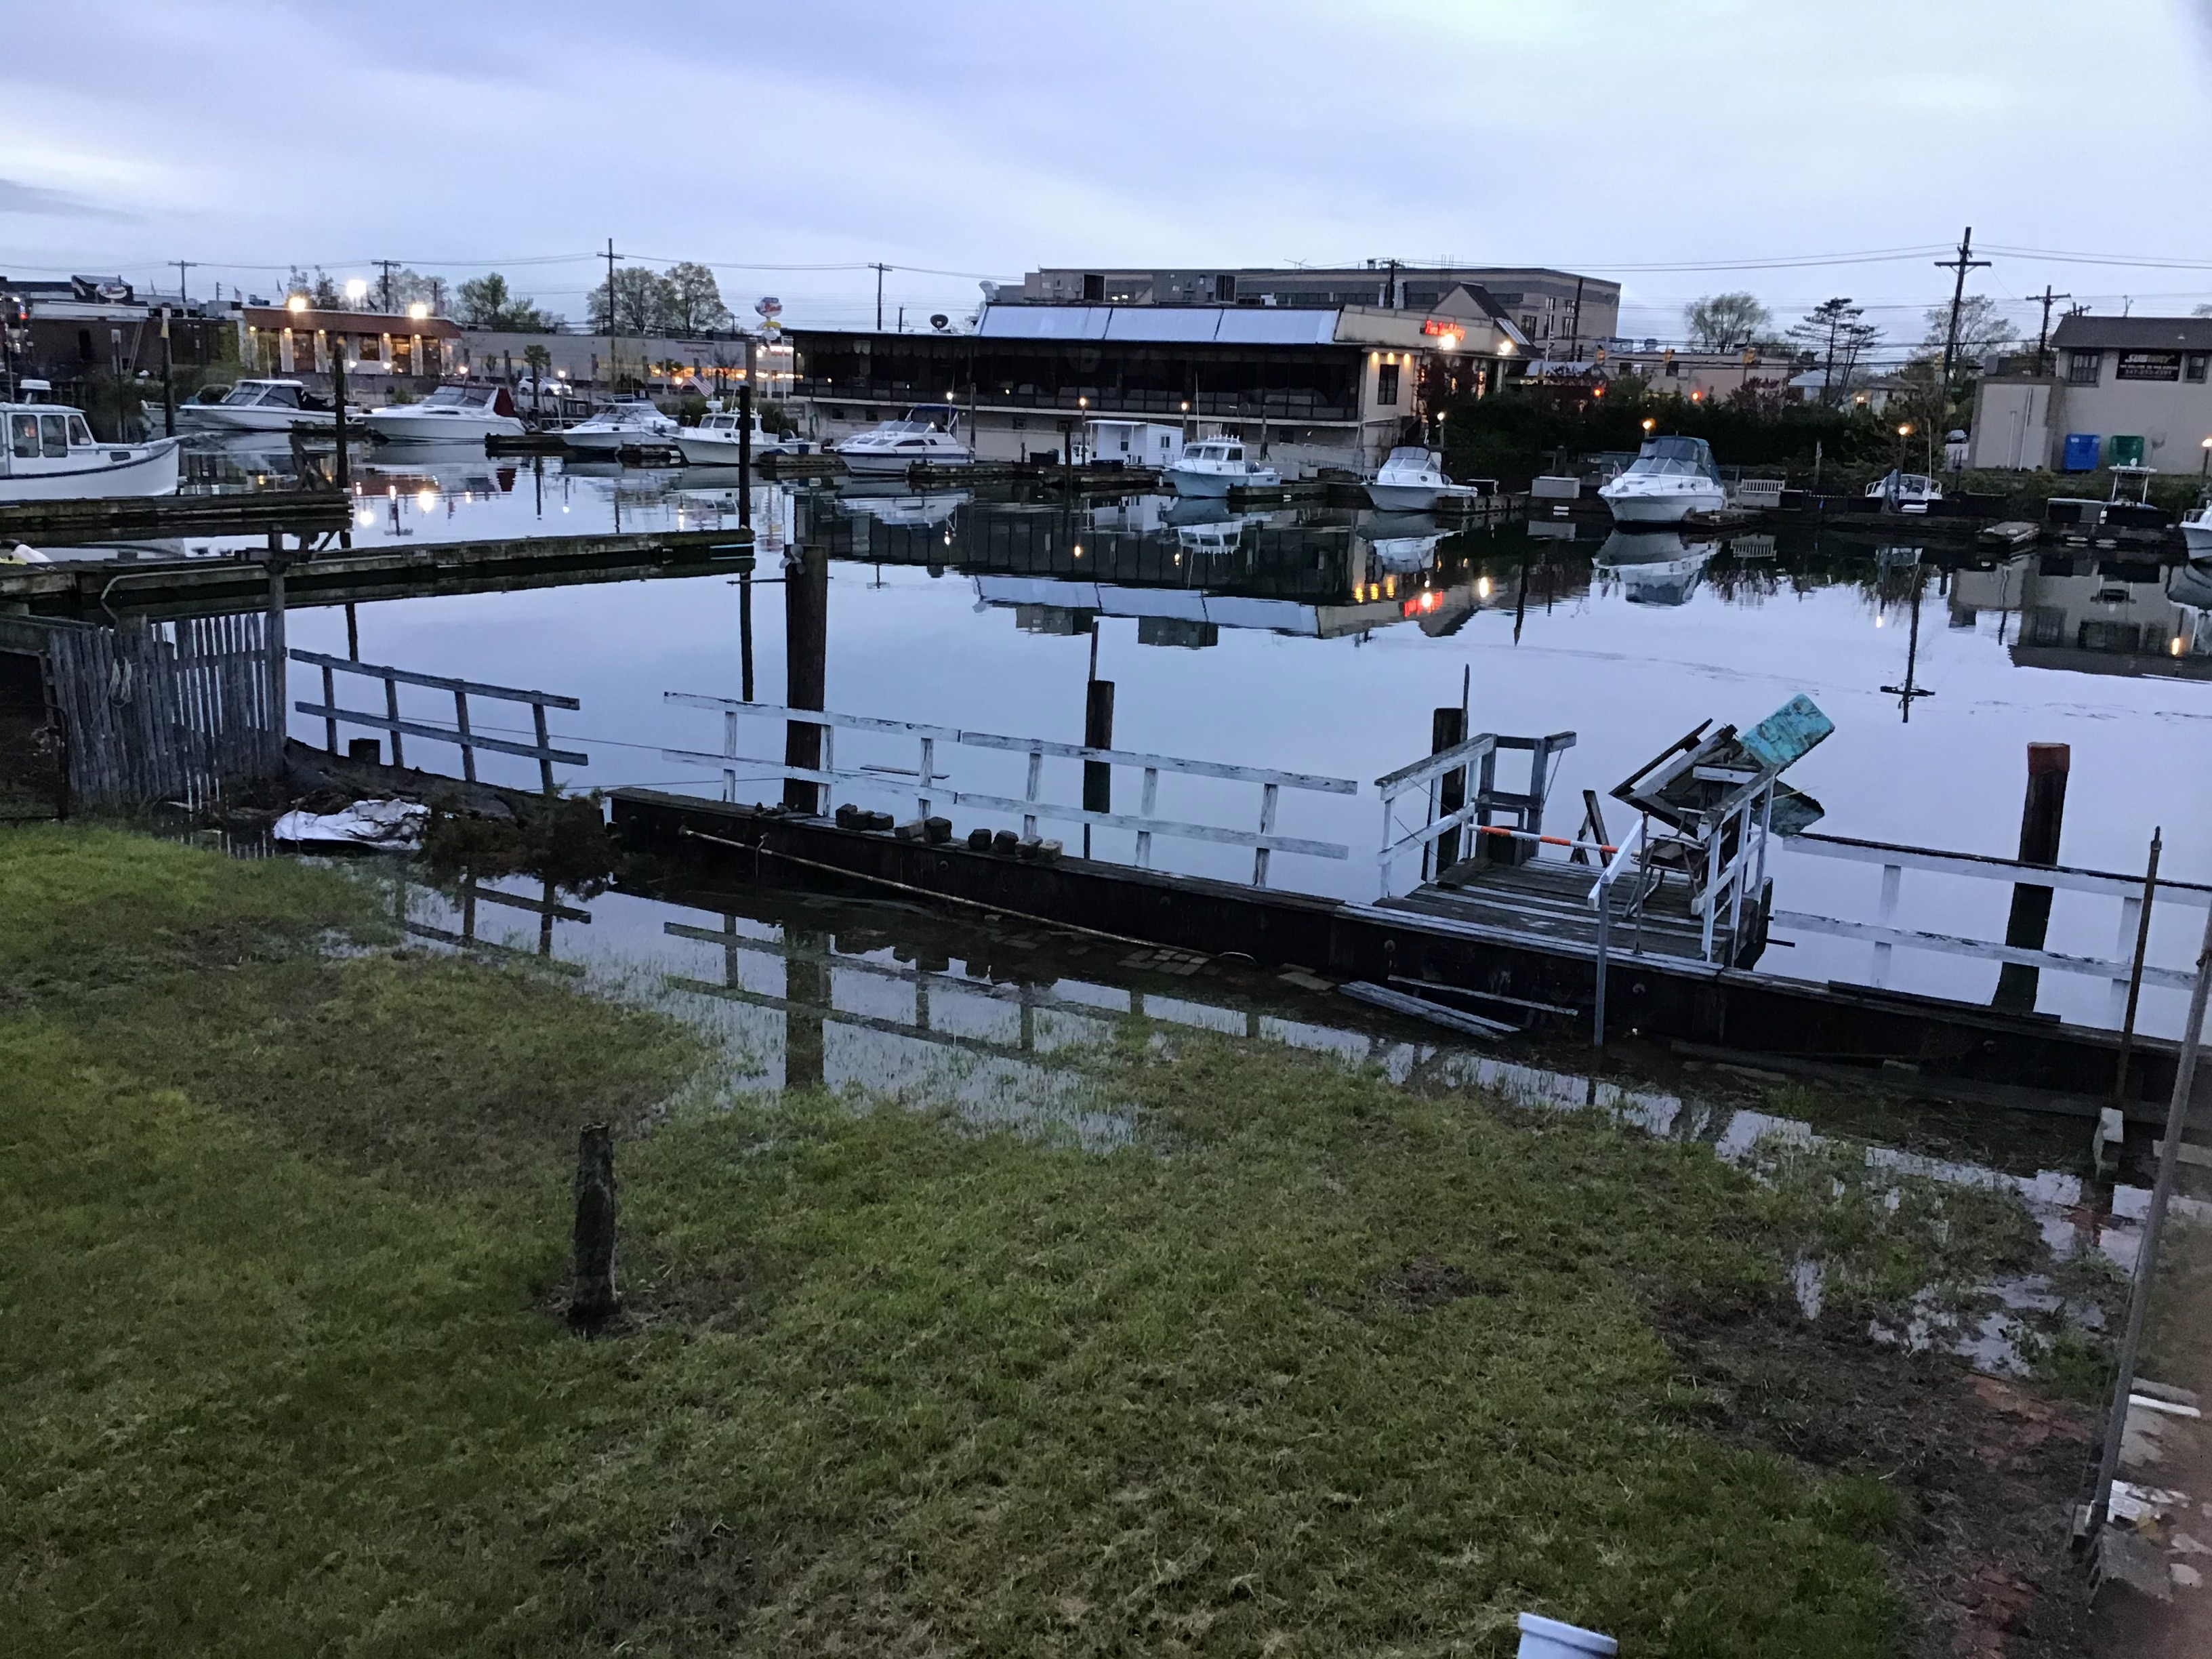

In [74]:
showimg(20)

### 1. brightness check to confirm time

In [60]:
img=Image.open(requests.get(df.loc[0,"images"].split("|")[0], stream=True).raw)
img_gray=img.convert("L")
sum(img_gray.getdata()) / len(img_gray.getdata())

122.50348933333333

In [65]:
def get_avg_br(img_str:str):
    '''
    takes in a string of image URIs separated by '|' and outputs the relative brightness of the images in the string
    '''
    # make sure you import `time` package

    if type(img_str)!=str or len(img_str)==0: # order matters, or error
        return None
    br_sum=[]
    img_list=img_str.split("|")
    # --The following is to handle the possible http429 problem (set sleep):
    # try:
    #     for imgurl in img_list:
    #         img=Image.open(requests.get(imgurl, stream=True).raw)
    #         img_gray=img.convert("L")
    #         br_sum.append(sum(img_gray.getdata()) / len(img_gray.getdata()))
    # except:
    #     time.sleep(2)
    #     for imgurl in img_list:
    #         img=Image.open(requests.get(imgurl, stream=True).raw)
    #         img_gray=img.convert("L")
    #         br_sum.append(sum(img_gray.getdata()) / len(img_gray.getdata()))

    for imgurl in img_list:
            img=Image.open(requests.get(imgurl, stream=True).raw)
            img_gray=img.convert("L")
            br_sum.append(sum(img_gray.getdata()) / len(img_gray.getdata()))
    return round(sum(br_sum)/len(br_sum),2)

In [82]:
print(f'ID: {df.loc[0,"ID #"]}\nTime: {df.loc[0,"photo_date"]+" "+df.loc[0,"photo_time"]}\nAverage Brightness: {get_avg_br(df.loc[0,"images"])}')

ID: 161872
Time: 2024-04-12 11:56 am
Average Brightness: 128.54


In [15]:
# Before apply to all rows, check brightness at night time: 
df[df["photo_time"].str.endswith("pm")].head(3)

index flooded-other guessDepth  AuthorEmail structure_damage  float_number  \
5      5           NaN          0          NaN              NaN           NaN   
6      6           NaN         10          NaN              NaN           NaN   
8      8           NaN          0          NaN              NaN           NaN   

  geo_locality beach_damage photo_time marinas_comments  ...  \
5          NaN          NaN   11:37 pm              NaN  ...   
6          NaN          NaN   11:13 pm              NaN  ...   
8          NaN          NaN    9:42 pm              NaN  ...   

   alternate-location-name  boat_number  weather_temperature  photo_date  \
5                      NaN          NaN                 54.9  2024-04-11   
6                      NaN          NaN                 56.6  2024-04-11   
8                      NaN          NaN                 52.1  2024-04-09   

  location_longitude                                  TideDataPredicted  \
5         -73.832696  https://tidesandcurrents.noaa.gov/noaatidepred...   
6         -73.831856  https://tidesandcurrents.noaa.gov/noaatidepred...   
8         -73.832824  https://tidesandcurrents.noaa.gov/noaatidepred...   

  beach_comments marinas_damage  geo_administrative_area_level_2  \
5            NaN            NaN                    Queens County   
6            NaN            NaN                    Queens County   
8            NaN            NaN                    Queens County   

  hazmat_comments  
5             NaN  
6             NaN  
8             NaN  

[3 rows x 52 columns]

48.11


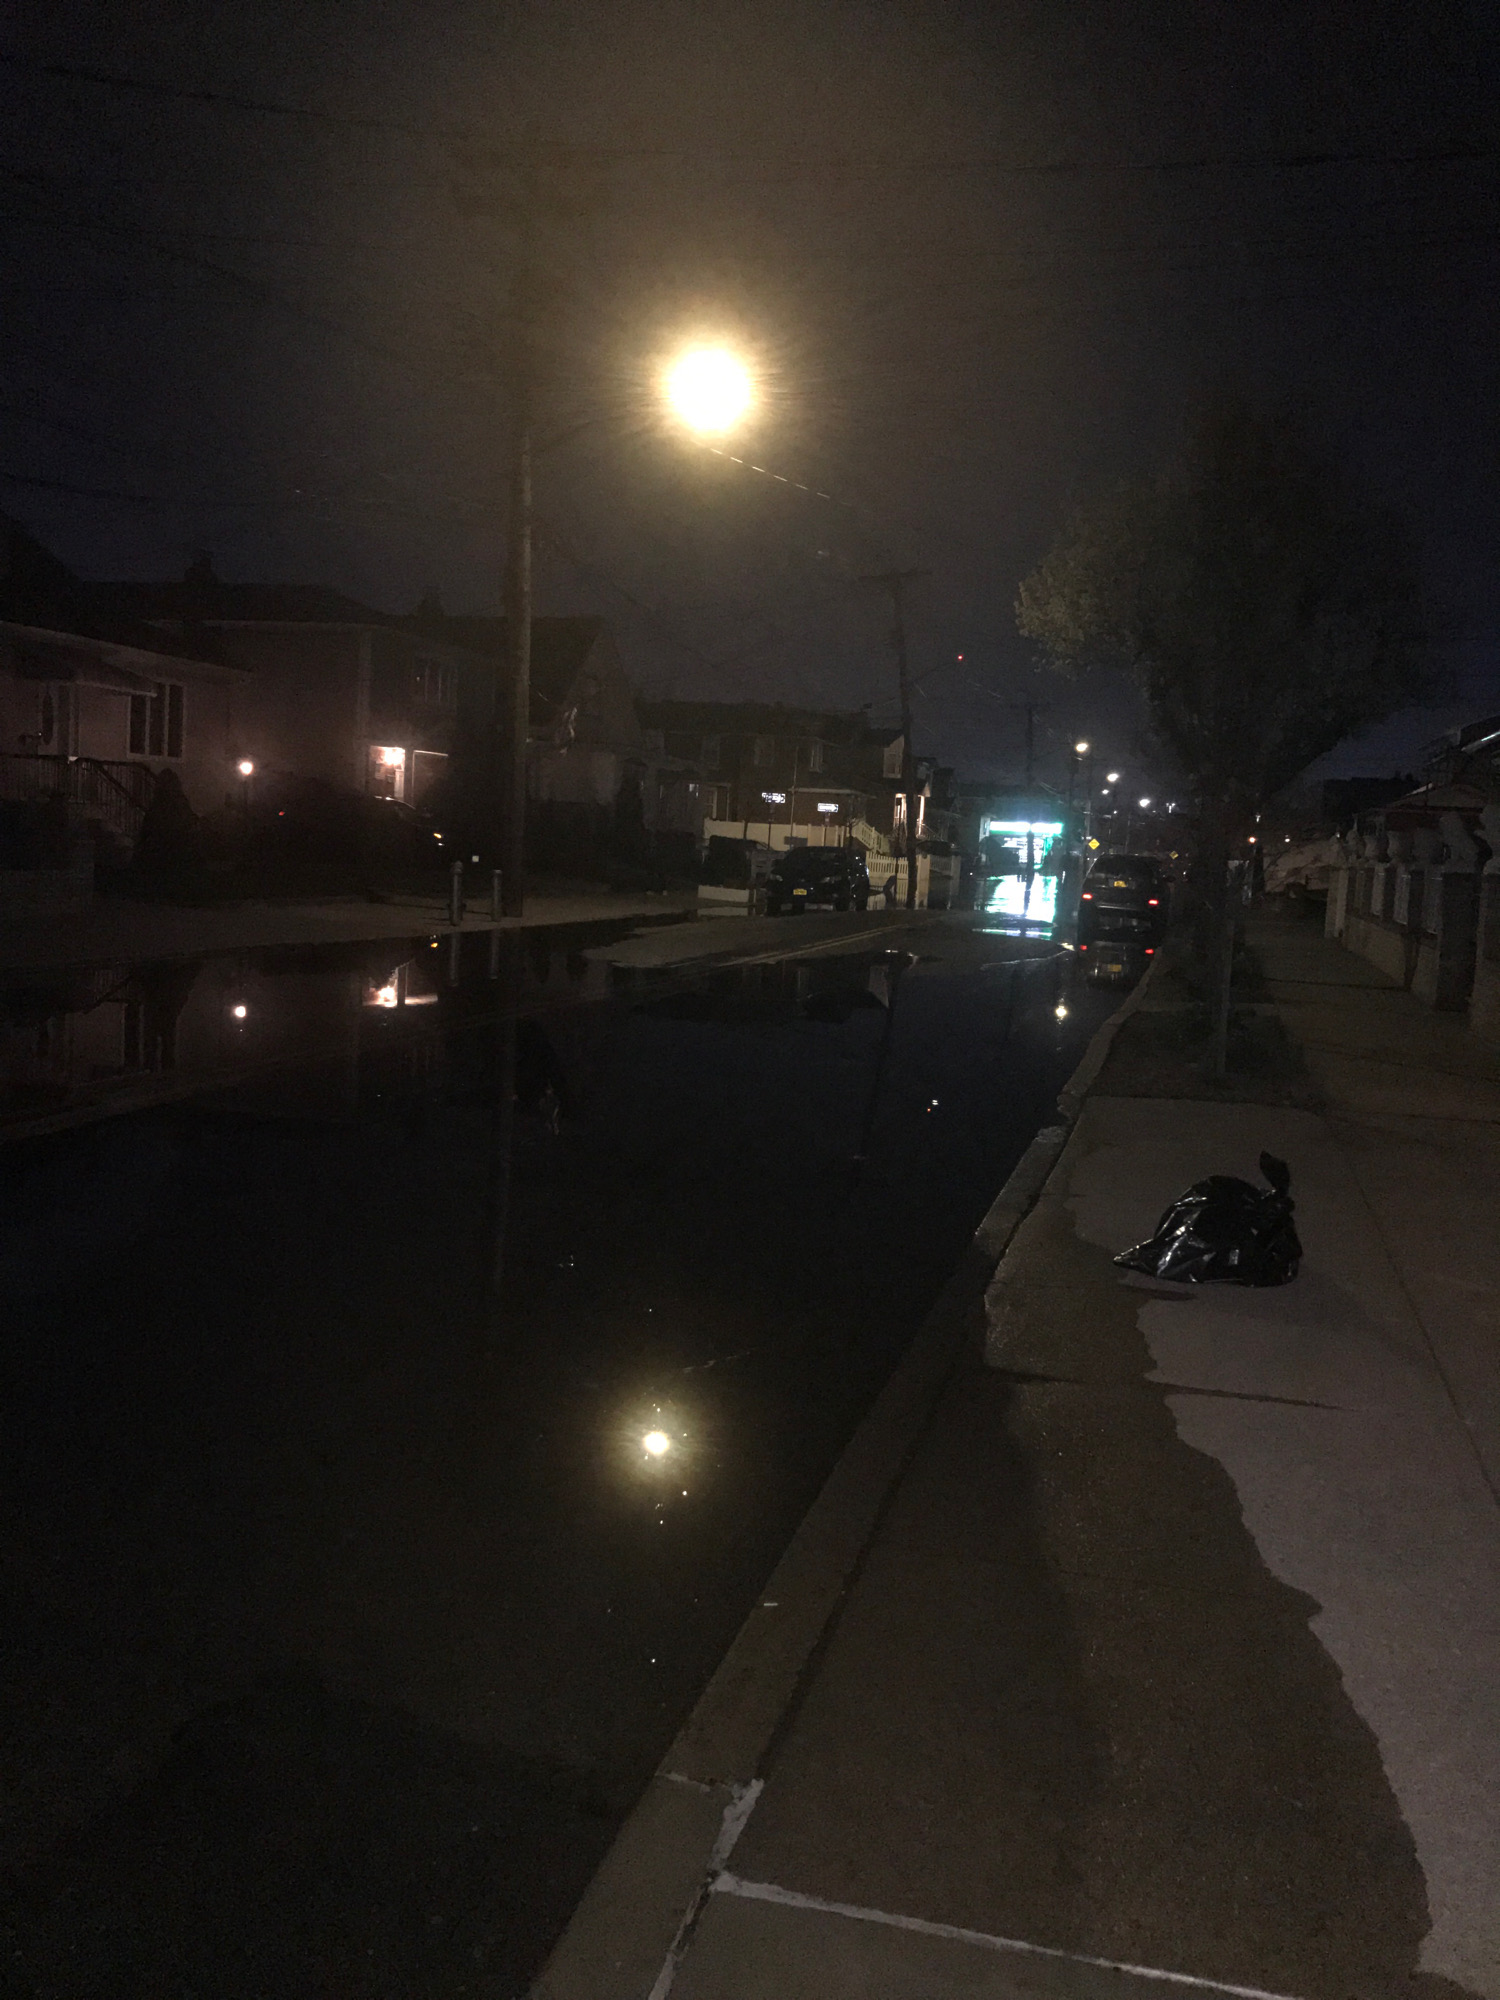

In [41]:
# choose idx=8
print(get_avg_br(df.loc[8,"images"]))
# very low, corresponds to night)
IPython.display.Image(df.loc[8,"images"].split("|")[0], width=300)

In [31]:
# check evening time to roughly set threshold 
df[(df["photo_time"].str.endswith("pm"))&(df["photo_time"].str.startswith("8"))].head(10)

index flooded-other guessDepth  AuthorEmail structure_damage  \
13      13           NaN          3          NaN              NaN   
73      73           NaN        NaN          NaN       No Impacts   
91      91           NaN        NaN          NaN       No Impacts   
356    356           NaN         15          NaN              NaN   
399    399           NaN        NaN          NaN       No Impacts   

     float_number geo_locality beach_damage photo_time marinas_comments  ...  \
13            NaN          NaN          NaN    8:04 pm              NaN  ...   
73            0.0          NaN   Accessible    8:33 pm              NaN  ...   
91            0.0   Mamaroneck   Accessible    8:14 pm              NaN  ...   
356           NaN          NaN          NaN    8:32 pm              NaN  ...   
399           0.0          NaN   Accessible    8:30 pm              NaN  ...   

     alternate-location-name  boat_number  weather_temperature  photo_date  \
13              Far Rockaway          NaN                 50.8  2024-04-08   
73                       NaN          0.0                 47.9  2024-03-09   
91             Columbus Park          0.0                 49.7  2024-03-02   
356                      NaN          NaN                 58.9  2023-06-03   
399                      NaN          0.0                 11.6  2022-12-23   

    location_longitude                                  TideDataPredicted  \
13          -73.769775  https://tidesandcurrents.noaa.gov/noaatidepred...   
73          -73.832805  https://tidesandcurrents.noaa.gov/noaatidepred...   
91          -73.737117  https://tidesandcurrents.noaa.gov/noaatidepred...   
356         -73.830773  https://tidesandcurrents.noaa.gov/noaatidepred...   
399         -73.841937  https://tidesandcurrents.noaa.gov/noaatidepred...   

    beach_comments marinas_damage  geo_administrative_area_level_2  \
13             NaN            NaN                    Queens County   
73             NaN     No Impacts                    Queens County   
91             NaN     No Impacts               Westchester County   
356            NaN            NaN                    Queens County   
399            NaN     No Impacts                    Queens County   

    hazmat_comments  
13              NaN  
73              NaN  
91              NaN  
356             NaN  
399             NaN  

[5 rows x 52 columns]

74.76


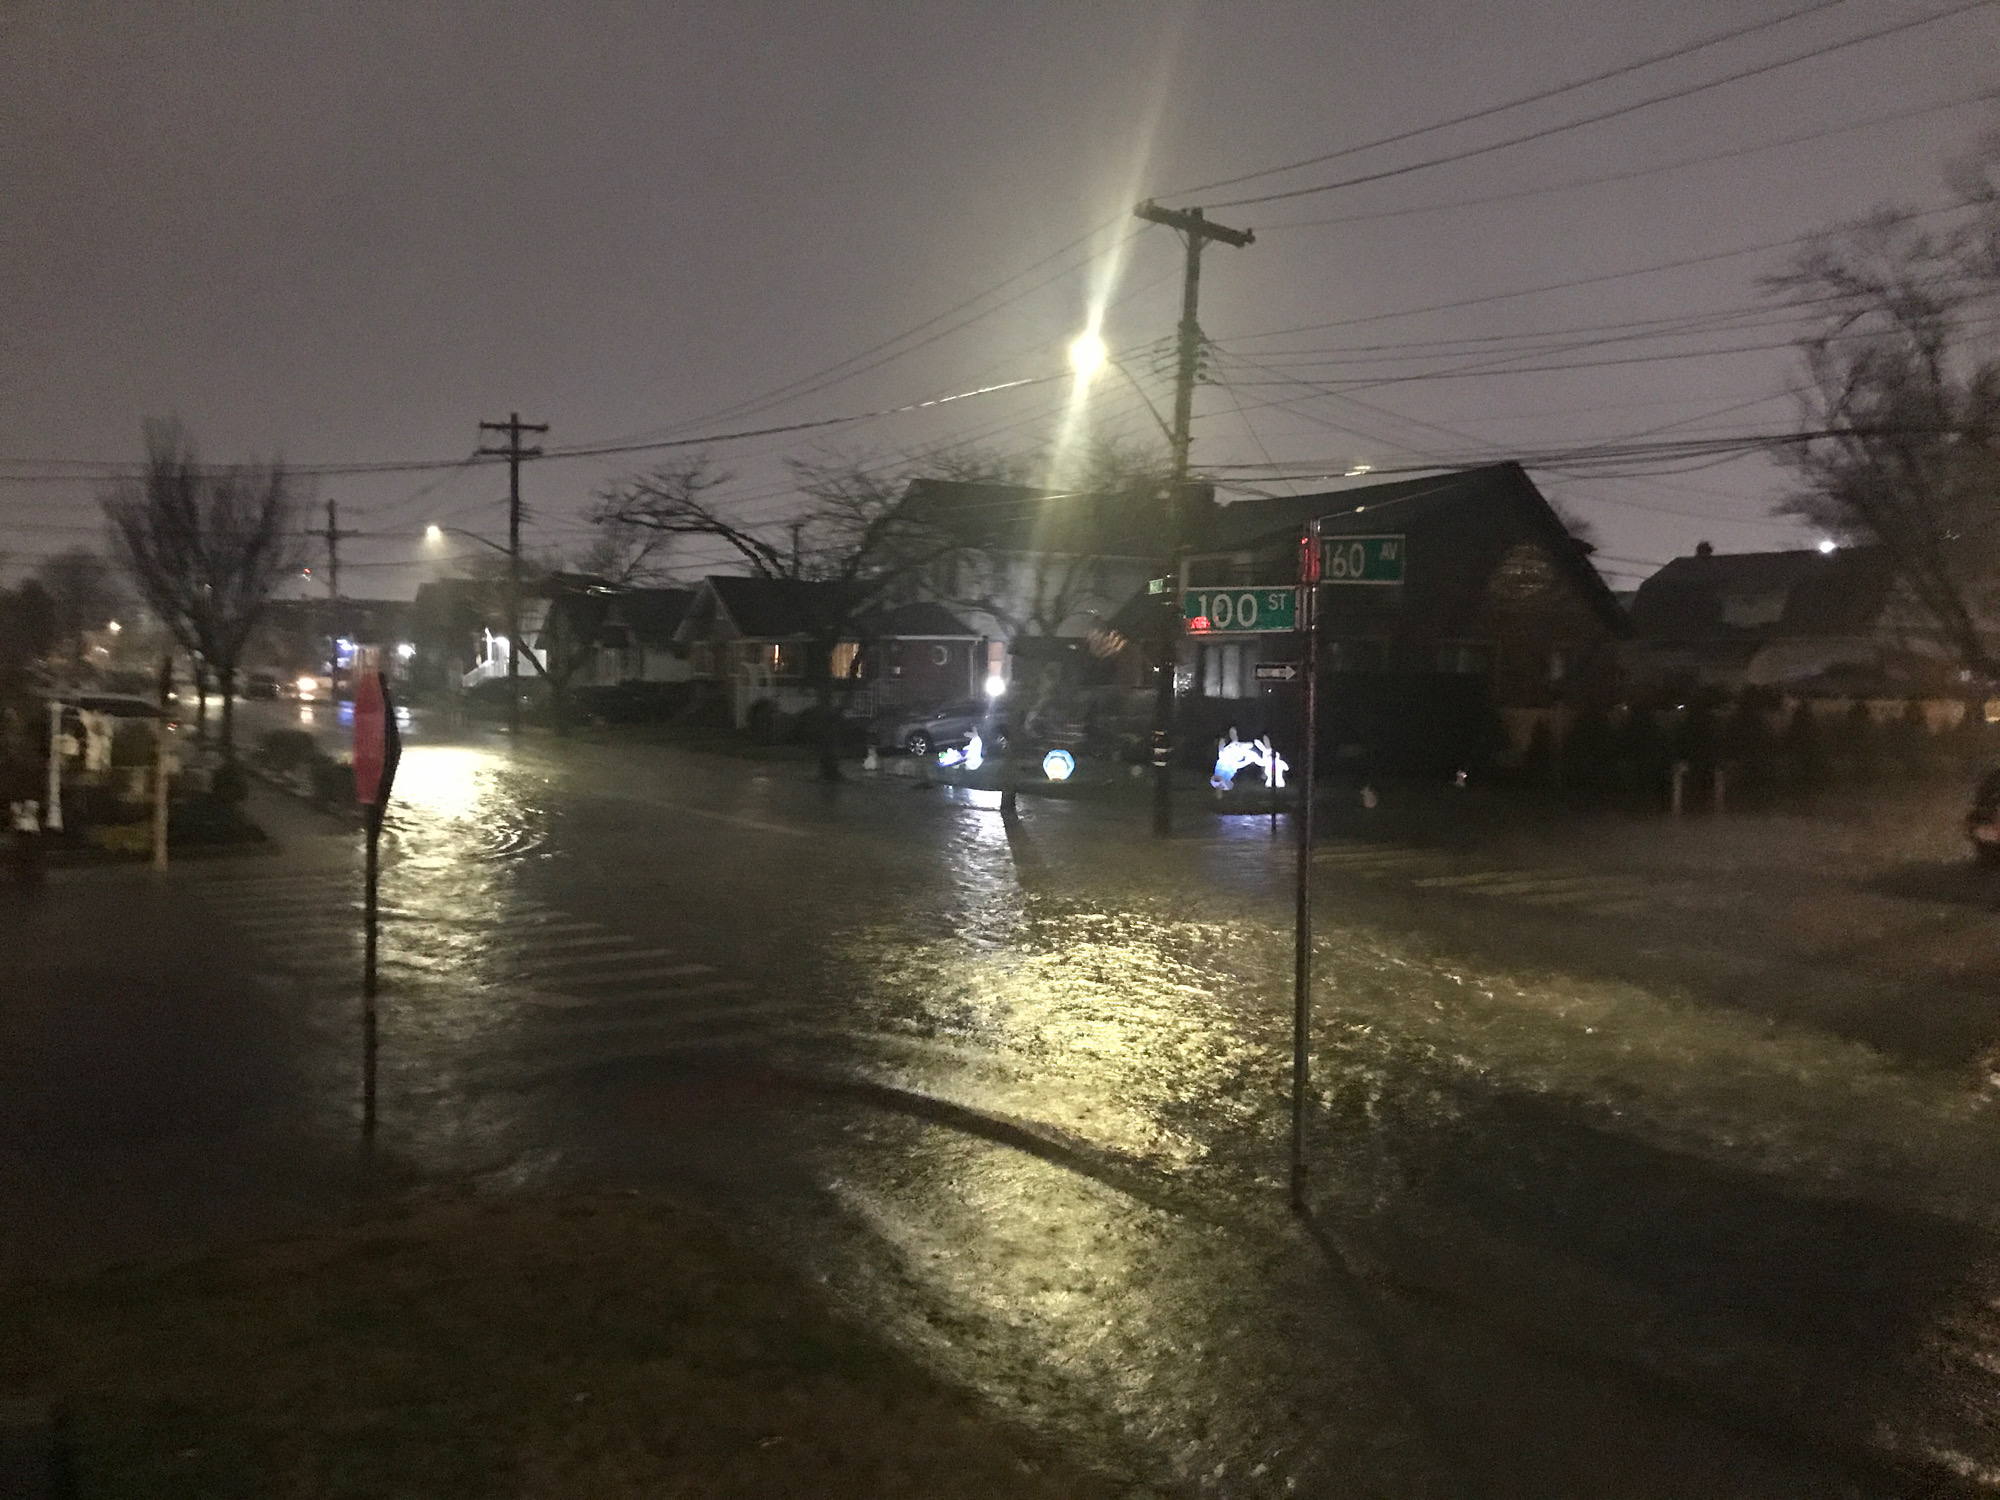

In [39]:
print(get_avg_br(df.loc[73,"images"]))
IPython.display.Image(df.loc[73,"images"].split("|")[0], width=300)

In [61]:
# add a process bar for this big task: -- not working, commented:
# tqdm.pandas(desc="Calculating brightness")
# df['brightness'] = tqdm(df['images']).progress_apply(get_avg_br)
df['brightness']=df["images"].apply(get_avg_br)

In [74]:
# self-defined time conversion func., has problems, not using:
def to24hr(tstr:str):
    if tstr.endswith("pm"):
        tstr=str(int(tstr.split(":")[0])+12)+":"+tstr.split(":")[1]
    return tstr[:-3]

In [ ]:
df['photo_time'] = pd.to_datetime(df['photo_time']).dt.strftime("%H:%M")

In [88]:
df.head(3)

index flooded-other guessDepth  AuthorEmail structure_damage  float_number  \
0      0           NaN          2          NaN              NaN           NaN   
1      1           NaN          0          NaN              NaN           NaN   
2      2           NaN          0          NaN              NaN           NaN   

  geo_locality beach_damage photo_time marinas_comments  ...  boat_number  \
0          NaN          NaN      11:56              NaN  ...          NaN   
1          NaN          NaN      11:40              NaN  ...          NaN   
2          NaN          NaN      11:37              NaN  ...          NaN   

   weather_temperature  photo_date location_longitude  \
0                 54.1  2024-04-12         -73.769758   
1                 54.9  2024-04-12         -73.832707   
2                 54.9  2024-04-12         -73.832843   

                                   TideDataPredicted beach_comments  \
0  https://tidesandcurrents.noaa.gov/noaatidepred...            NaN   
1  https://tidesandcurrents.noaa.gov/noaatidepred...            NaN   
2  https://tidesandcurrents.noaa.gov/noaatidepred...            NaN   

  marinas_damage geo_administrative_area_level_2  hazmat_comments brightness  
0            NaN                   Queens County              NaN     128.54  
1            NaN                   Queens County              NaN     156.08  
2            NaN                   Queens County              NaN     148.64  

[3 rows x 53 columns]

In [89]:
df.to_csv("df.csv")

## <a id="part4"></a>import `df.csv`

In [61]:
df=pd.read_csv("df.csv")

In [62]:
df[(pd.to_numeric(df["photo_time"].str[:2], errors='coerce') > 9) & 
   (pd.to_numeric(df["photo_time"].str[:2], errors='coerce') < 17)&
   (df["brightness"]<70)]

Unnamed: 0  index flooded-other guessDepth  AuthorEmail  \
226          226    226           NaN          0          NaN   
353          353    353           NaN          4          NaN   
364          364    364           NaN         24          NaN   
524          524    524           NaN         24          NaN   
636          636    636           NaN         30          NaN   
...          ...    ...           ...        ...          ...   
1637        1637    437           NaN        NaN          NaN   
1638        1638    438           NaN         20          NaN   
1639        1639    439           NaN        NaN          NaN   
1777        1777    577           NaN        NaN          NaN   
1779        1779    579           NaN        NaN          NaN   

     structure_damage  float_number  geo_locality beach_damage photo_time  \
226               NaN           NaN    High Falls          NaN      16:48   
353               NaN           NaN           NaN          NaN      16:00   
364               NaN           NaN           NaN          NaN      16:00   
524               NaN           NaN  Old Westbury          NaN      16:00   
636               NaN           NaN  Old Westbury          NaN      16:00   
...               ...           ...           ...          ...        ...   
1637              NaN           NaN           NaN          NaN      16:00   
1638              NaN           NaN           NaN          NaN      16:00   
1639              NaN           NaN           NaN          NaN      16:00   
1777              NaN           NaN           NaN          NaN      16:00   
1779              NaN           NaN           NaN          NaN      16:00   

      ... boat_number  weather_temperature  photo_date  location_longitude  \
226   ...         NaN                 46.3  2023-12-18          -74.151986   
353   ...         NaN                 74.0  2023-06-12          -73.942680   
364   ...         NaN                 55.1  2023-04-30          -73.886160   
524   ...         NaN                 76.1  2022-09-16          -73.582051   
636   ...         NaN                 72.7  2021-09-01          -73.582051   
...   ...         ...                  ...         ...                 ...   
1637  ...         NaN                 53.6  2018-12-21          -73.830104   
1638  ...         NaN                 53.7  2018-12-21          -73.830570   
1639  ...         NaN                 53.6  2018-12-21          -73.829535   
1777  ...         NaN                 62.2  2018-09-10          -73.830255   
1779  ...         NaN                 62.2  2018-09-10          -73.829887   

                                      TideDataPredicted beach_comments  \
226   https://tidesandcurrents.noaa.gov/noaatidepred...            NaN   
353   https://tidesandcurrents.noaa.gov/noaatidepred...            NaN   
364   https://tidesandcurrents.noaa.gov/noaatidepred...            NaN   
524   https://tidesandcurrents.noaa.gov/noaatidepred...            NaN   
636   https://tidesandcurrents.noaa.gov/noaatidepred...            NaN   
...                                                 ...            ...   
1637  https://tidesandcurrents.noaa.gov/noaatidepred...            NaN   
1638  https://tidesandcurrents.noaa.gov/noaatidepred...            NaN   
1639  https://tidesandcurrents.noaa.gov/noaatidepred...            NaN   
1777  https://tidesandcurrents.noaa.gov/noaatidepred...            NaN   
1779  https://tidesandcurrents.noaa.gov/noaatidepred...            NaN   

     marinas_damage geo_administrative_area_level_2 hazmat_comments  \
226             NaN                   Ulster County             NaN   
353             NaN                    Kings County             NaN   
364             NaN                   Queens County             NaN   
524             NaN                   Nassau County             NaN   
636             NaN                   Nassau County             NaN   
...             ...                             

In [63]:
def showimginfo(iloc:int):
    print(get_avg_br(df.loc[iloc,"images"]))
    IPython.display.Image(df.loc[iloc,"images"].split("|")[0], width=300)

39.27


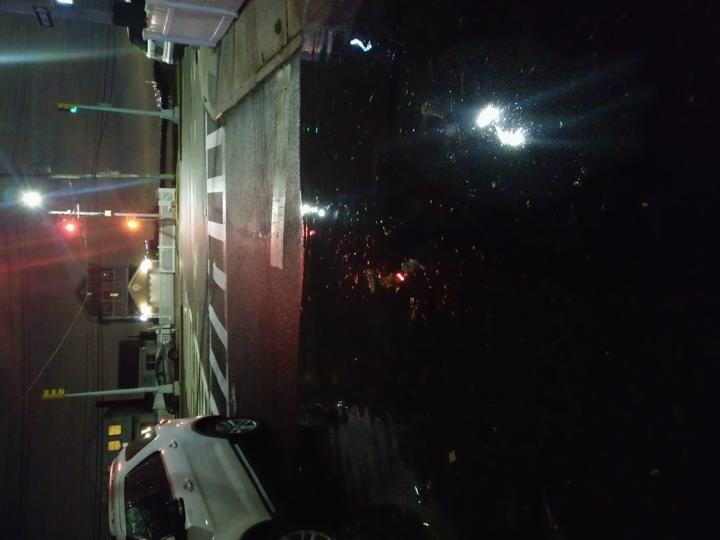

In [71]:
print(get_avg_br(df.loc[1022,"images"]))
IPython.display.Image(df.loc[1022,"images"].split("|")[0], width=300)

52.06


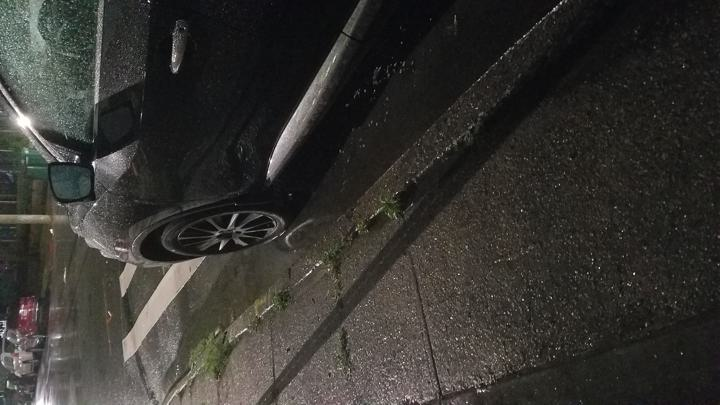

In [97]:
print(get_avg_br(df.loc[353,"images"]))
IPython.display.Image(df.loc[353,"images"].split("|")[0], width=300)